In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


In [2]:
# Улучшаем качество графиков
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
sns.set_style("whitegrid")

# Загрузка данных
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


In [3]:
print("1. АНАЛИЗ ДАННЫХ")
print("=" * 50)

# Количество пропущенных значений
print("Количество пропущенных значений:")
print(iris_df.isnull().sum())
print()

# Минимальные, максимальные и средние значения
print("Описательная статистика для всех данных:")
print(iris_df.describe())
print()


1. АНАЛИЗ ДАННЫХ
Количество пропущенных значений:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Описательная статистика для всех данных:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%         

In [4]:
# Разделение на обучающую и тестовую выборки (80/20)
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Для 2 параметров (sepal length и sepal width)
X_2d = X[:, :2]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42, stratify=y)


In [5]:
print("2. СВОДНАЯ ИНФОРМАЦИЯ ОБ ОБУЧАЮЩЕМ МНОЖЕСТВЕ")
print("=" * 50)
print(f"Количество строк в обучающем множестве: {len(X_train)}")
print(f"Количество объектов в каждом классе:")
train_species_counts = pd.Series(y_train).value_counts().sort_index()
for i, count in train_species_counts.items():
    print(f"  {iris.target_names[i]}: {count}")

print("\nОписательная статистика обучающего множества:")
train_df = pd.DataFrame(X_train, columns=iris.feature_names)
print(train_df.describe())
print()


2. СВОДНАЯ ИНФОРМАЦИЯ ОБ ОБУЧАЮЩЕМ МНОЖЕСТВЕ
Количество строк в обучающем множестве: 120
Количество объектов в каждом классе:
  setosa: 40
  versicolor: 40
  virginica: 40

Описательная статистика обучающего множества:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         120.000000        120.000000          120.00000   
mean            5.841667          3.048333            3.77000   
std             0.840926          0.448524            1.76852   
min             4.300000          2.000000            1.10000   
25%             5.100000          2.800000            1.60000   
50%             5.750000          3.000000            4.25000   
75%             6.400000          3.325000            5.10000   
max             7.900000          4.400000            6.90000   

       petal width (cm)  
count        120.000000  
mean           1.205000  
std            0.762663  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%          

In [6]:
# Функция для расчета специфичности
def calculate_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    specificity = []
    for i in range(len(cm)):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        specificity.append(tn / (tn + fp) if (tn + fp) > 0 else 0)
    return specificity


In [7]:
# Функция для вывода полной классификации
def print_classification_report(y_true, y_pred, target_names):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    specificity = calculate_specificity(y_true, y_pred)

    print(f"Точность классификации: {accuracy:.3f}")
    print(f"Уровень ошибки: {1 - accuracy:.3f}")
    print("\nПо классам:")
    for i, name in enumerate(target_names):
        print(f"  {name}:")
        print(f"    Точность (Precision): {precision[i]:.3f}")
        print(f"    Чувствительность (Recall): {recall[i]:.3f}")
        print(f"    Специфичность (Specificity): {specificity[i]:.3f}")

    print("\nМатрица ошибок:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

In [8]:
print("3. НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР")
print("=" * 50)

# Для 4 параметров
print("РЕЗУЛЬТАТЫ ДЛЯ 4 ПАРАМЕТРОВ:")
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
print_classification_report(y_test, y_pred_nb, iris.target_names)
print()

print("Наивный Байес (4 параметра) - ОБУЧАЮЩЕЕ МНОЖЕСТВО:")
y_train_pred_nb = nb_classifier.predict(X_train)
print_classification_report(y_train, y_train_pred_nb, iris.target_names)

3. НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР
РЕЗУЛЬТАТЫ ДЛЯ 4 ПАРАМЕТРОВ:
Точность классификации: 0.967
Уровень ошибки: 0.033

По классам:
  setosa:
    Точность (Precision): 1.000
    Чувствительность (Recall): 1.000
    Специфичность (Specificity): 1.000
  versicolor:
    Точность (Precision): 1.000
    Чувствительность (Recall): 0.900
    Специфичность (Specificity): 1.000
  virginica:
    Точность (Precision): 0.909
    Чувствительность (Recall): 1.000
    Специфичность (Specificity): 0.950

Матрица ошибок:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Наивный Байес (4 параметра) - ОБУЧАЮЩЕЕ МНОЖЕСТВО:
Точность классификации: 0.958
Уровень ошибки: 0.042

По классам:
  setosa:
    Точность (Precision): 1.000
    Чувствительность (Recall): 1.000
    Специфичность (Specificity): 1.000
  versicolor:
    Точность (Precision): 0.927
    Чувствительность (Recall): 0.950
    Специфичность (Specificity): 0.963
  virginica:
    Точность (Precision): 0.949
    Чувствительность (Recall): 0.925
    Специфичнос

In [9]:
# Для 2 параметров
print("РЕЗУЛЬТАТЫ ДЛЯ 2 ПАРАМЕТРОВ (sepal length и width):")
nb_classifier_2d = GaussianNB()
nb_classifier_2d.fit(X_train_2d, y_train_2d)
y_pred_nb_2d = nb_classifier_2d.predict(X_test_2d)
print_classification_report(y_test_2d, y_pred_nb_2d, iris.target_names)
print()
print("\nНаивный Байес (2 параметра) - ОБУЧАЮЩЕЕ МНОЖЕСТВО:")
y_train_pred_nb_2d = nb_classifier_2d.predict(X_train_2d)
print_classification_report(y_train_2d, y_train_pred_nb_2d, iris.target_names)

РЕЗУЛЬТАТЫ ДЛЯ 2 ПАРАМЕТРОВ (sepal length и width):
Точность классификации: 0.700
Уровень ошибки: 0.300

По классам:
  setosa:
    Точность (Precision): 1.000
    Чувствительность (Recall): 1.000
    Специфичность (Specificity): 1.000
  versicolor:
    Точность (Precision): 0.556
    Чувствительность (Recall): 0.500
    Специфичность (Specificity): 0.800
  virginica:
    Точность (Precision): 0.545
    Чувствительность (Recall): 0.600
    Специфичность (Specificity): 0.750

Матрица ошибок:
[[10  0  0]
 [ 0  5  5]
 [ 0  4  6]]


Наивный Байес (2 параметра) - ОБУЧАЮЩЕЕ МНОЖЕСТВО:
Точность классификации: 0.808
Уровень ошибки: 0.192

По классам:
  setosa:
    Точность (Precision): 0.976
    Чувствительность (Recall): 1.000
    Специфичность (Specificity): 0.988
  versicolor:
    Точность (Precision): 0.696
    Чувствительность (Recall): 0.800
    Специфичность (Specificity): 0.825
  virginica:
    Точность (Precision): 0.758
    Чувствительность (Recall): 0.625
    Специфичность (Specifici

In [16]:
print("4. ДЕРЕВЬЯ РЕШЕНИЙ")
print("=" * 50)

# Для 4 параметров - ПОЛНОЕ ДЕРЕВО
print("РЕЗУЛЬТАТЫ ДЛЯ 4 ПАРАМЕТРОВ:")
dt_classifier = DecisionTreeClassifier(random_state=42,max_depth=3)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
print_classification_report(y_test, y_pred_dt, iris.target_names)

print("\nДерево решений (4 параметра) - ОБУЧАЮЩЕЕ МНОЖЕСТВО:")
y_train_pred_dt = dt_classifier.predict(X_train)
print_classification_report(y_train, y_train_pred_dt, iris.target_names)


print(f"Глубина дерева (4 параметра): {dt_classifier.get_depth()}")
print(f"Количество листьев (4 параметра): {dt_classifier.get_n_leaves()}")



4. ДЕРЕВЬЯ РЕШЕНИЙ
РЕЗУЛЬТАТЫ ДЛЯ 4 ПАРАМЕТРОВ:
Точность классификации: 0.967
Уровень ошибки: 0.033

По классам:
  setosa:
    Точность (Precision): 1.000
    Чувствительность (Recall): 1.000
    Специфичность (Specificity): 1.000
  versicolor:
    Точность (Precision): 1.000
    Чувствительность (Recall): 0.900
    Специфичность (Specificity): 1.000
  virginica:
    Точность (Precision): 0.909
    Чувствительность (Recall): 1.000
    Специфичность (Specificity): 0.950

Матрица ошибок:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Дерево решений (4 параметра) - ОБУЧАЮЩЕЕ МНОЖЕСТВО:
Точность классификации: 0.983
Уровень ошибки: 0.017

По классам:
  setosa:
    Точность (Precision): 1.000
    Чувствительность (Recall): 1.000
    Специфичность (Specificity): 1.000
  versicolor:
    Точность (Precision): 1.000
    Чувствительность (Recall): 0.950
    Специфичность (Specificity): 1.000
  virginica:
    Точность (Precision): 0.952
    Чувствительность (Recall): 1.000
    Специфичность (Specificity):

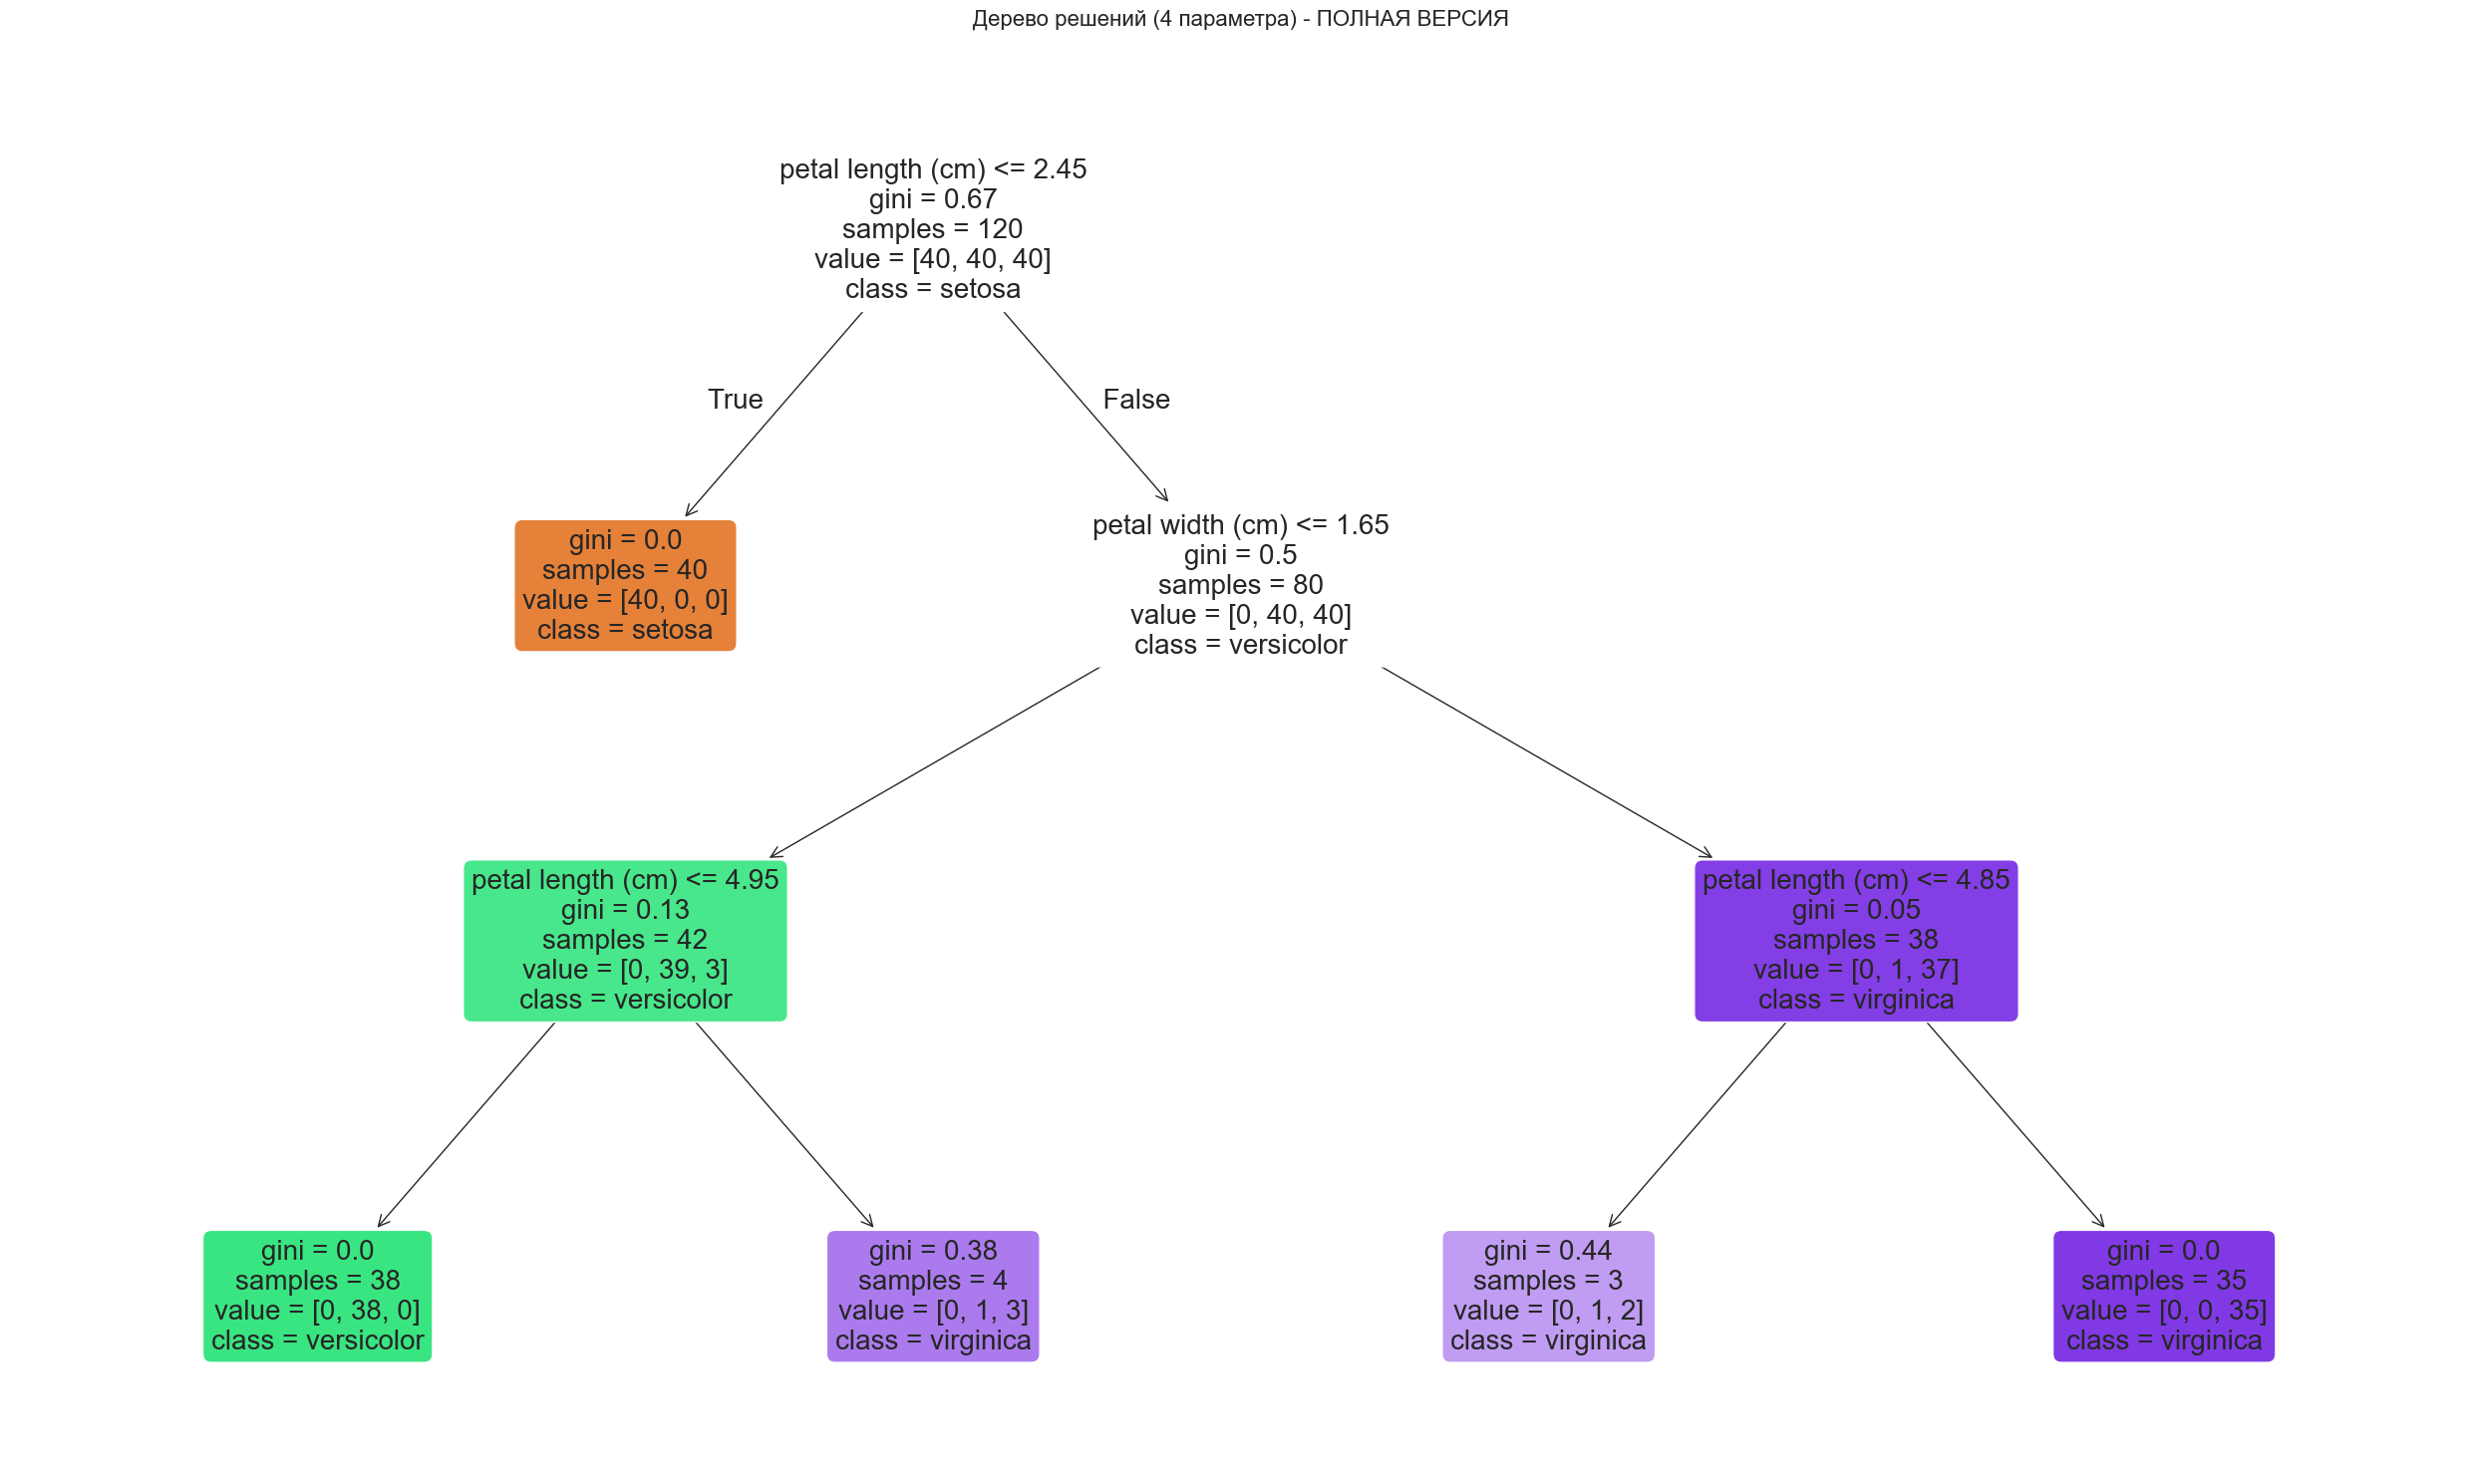

In [18]:
# Визуализация ПОЛНОГО дерева для 4 параметров
plt.figure(figsize=(25, 15))
plot_tree(dt_classifier,
          max_depth=3,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=20,
          precision=2)
plt.title("Дерево решений (4 параметра) - ПОЛНАЯ ВЕРСИЯ", fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('decision_tree_4d_full.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# Для 2 параметров - ПОЛНОЕ ДЕРЕВО
print("\nРЕЗУЛЬТАТЫ ДЛЯ 2 ПАРАМЕТРОВ:")
dt_classifier_2d = DecisionTreeClassifier(random_state=42,max_depth=3)
dt_classifier_2d.fit(X_train_2d, y_train_2d)
y_pred_dt_2d = dt_classifier_2d.predict(X_test_2d)
print_classification_report(y_test_2d, y_pred_dt_2d, iris.target_names)

print("\nДерево решений (2 параметра) - ОБУЧАЮЩЕЕ МНОЖЕСТВО:")
y_train_pred_dt_2d = dt_classifier_2d.predict(X_train_2d)
print_classification_report(y_train_2d, y_train_pred_dt_2d, iris.target_names)

print(f"Глубина дерева (2 параметра): {dt_classifier_2d.get_depth()}")
print(f"Количество листьев (2 параметра): {dt_classifier_2d.get_n_leaves()}")





РЕЗУЛЬТАТЫ ДЛЯ 2 ПАРАМЕТРОВ:
Точность классификации: 0.667
Уровень ошибки: 0.333

По классам:
  setosa:
    Точность (Precision): 0.833
    Чувствительность (Recall): 1.000
    Специфичность (Specificity): 0.900
  versicolor:
    Точность (Precision): 0.500
    Чувствительность (Recall): 0.300
    Специфичность (Specificity): 0.850
  virginica:
    Точность (Precision): 0.583
    Чувствительность (Recall): 0.700
    Специфичность (Specificity): 0.750

Матрица ошибок:
[[10  0  0]
 [ 2  3  5]
 [ 0  3  7]]

Дерево решений (2 параметра) - ОБУЧАЮЩЕЕ МНОЖЕСТВО:
Точность классификации: 0.858
Уровень ошибки: 0.142

По классам:
  setosa:
    Точность (Precision): 0.976
    Чувствительность (Recall): 1.000
    Специфичность (Specificity): 0.988
  versicolor:
    Точность (Precision): 0.816
    Чувствительность (Recall): 0.775
    Специфичность (Specificity): 0.912
  virginica:
    Точность (Precision): 0.780
    Чувствительность (Recall): 0.800
    Специфичность (Specificity): 0.887

Матрица ош

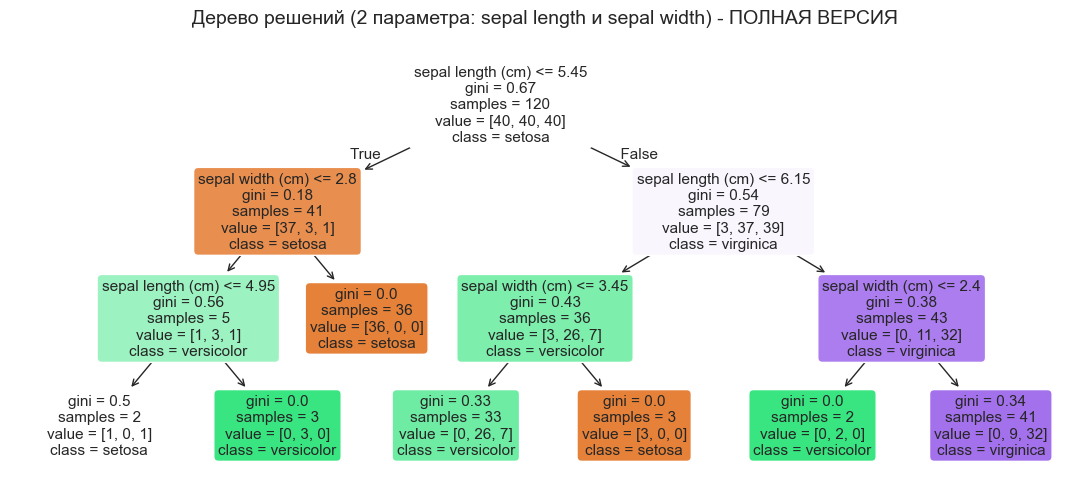

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [22]:
# Визуализация ПОЛНОГО дерева для 2 параметров
plt.figure(figsize=(11, 5))  # Уменьшил размер окна
plot_tree(dt_classifier_2d,
          max_depth=3,
          feature_names=iris.feature_names[:2],
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=11,  # Уменьшил шрифт
          precision=2)
plt.title("Дерево решений (2 параметра: sepal length и sepal width) - ПОЛНАЯ ВЕРСИЯ", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Дополнительная визуализация: границы решений для 2 параметров
plt.figure(figsize=(15, 6))


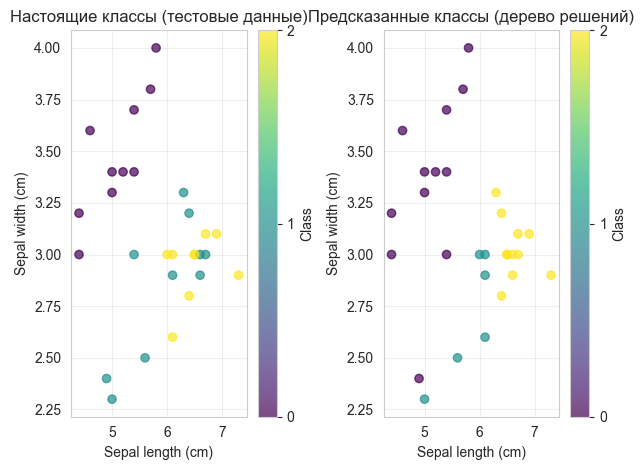

In [31]:
# Визуализация настоящих классов
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test_2d, cmap='viridis', alpha=0.7)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Настоящие классы (тестовые данные)')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Class')
plt.grid(True, alpha=0.3)
# Визуализация предсказанных классов
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred_dt_2d, cmap='viridis', alpha=0.7)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Предсказанные классы (дерево решений)')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Class')
plt.grid(True, alpha=0.3)

plt.tight_layout()

plt.show()



In [33]:
print("5. МЕТОД ОПОРНЫХ ВЕКТОРОВ (SVM)")
print("=" * 50)

# Для 4 параметров
print("РЕЗУЛЬТАТЫ ДЛЯ 4 ПАРАМЕТРОВ:")
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
print_classification_report(y_test, y_pred_svm, iris.target_names)
print()
# Для обучающего множества - SVM
print("\nSVM (4 параметра) - ОБУЧАЮЩЕЕ МНОЖЕСТВО:")
y_train_pred_svm = svm_classifier.predict(X_train)
print_classification_report(y_train, y_train_pred_svm, iris.target_names)



5. МЕТОД ОПОРНЫХ ВЕКТОРОВ (SVM)
РЕЗУЛЬТАТЫ ДЛЯ 4 ПАРАМЕТРОВ:
Точность классификации: 0.967
Уровень ошибки: 0.033

По классам:
  setosa:
    Точность (Precision): 1.000
    Чувствительность (Recall): 1.000
    Специфичность (Specificity): 1.000
  versicolor:
    Точность (Precision): 1.000
    Чувствительность (Recall): 0.900
    Специфичность (Specificity): 1.000
  virginica:
    Точность (Precision): 0.909
    Чувствительность (Recall): 1.000
    Специфичность (Specificity): 0.950

Матрица ошибок:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


SVM (4 параметра) - ОБУЧАЮЩЕЕ МНОЖЕСТВО:
Точность классификации: 0.983
Уровень ошибки: 0.017

По классам:
  setosa:
    Точность (Precision): 1.000
    Чувствительность (Recall): 1.000
    Специфичность (Specificity): 1.000
  versicolor:
    Точность (Precision): 0.975
    Чувствительность (Recall): 0.975
    Специфичность (Specificity): 0.988
  virginica:
    Точность (Precision): 0.975
    Чувствительность (Recall): 0.975
    Специфичность (Specificit

In [34]:
# Для 2 параметров
print("РЕЗУЛЬТАТЫ ДЛЯ 2 ПАРАМЕТРОВ:")
svm_classifier_2d = SVC(kernel='rbf', random_state=42)
svm_classifier_2d.fit(X_train_2d, y_train_2d)
y_pred_svm_2d = svm_classifier_2d.predict(X_test_2d)
print_classification_report(y_test_2d, y_pred_svm_2d, iris.target_names)
print()

print("\nSVM (2 параметра) - ОБУЧАЮЩЕЕ МНОЖЕСТВО:")
y_train_pred_svm_2d = svm_classifier_2d.predict(X_train_2d)
print_classification_report(y_train_2d, y_train_pred_svm_2d, iris.target_names)


РЕЗУЛЬТАТЫ ДЛЯ 2 ПАРАМЕТРОВ:
Точность классификации: 0.700
Уровень ошибки: 0.300

По классам:
  setosa:
    Точность (Precision): 1.000
    Чувствительность (Recall): 1.000
    Специфичность (Specificity): 1.000
  versicolor:
    Точность (Precision): 0.556
    Чувствительность (Recall): 0.500
    Специфичность (Specificity): 0.800
  virginica:
    Точность (Precision): 0.545
    Чувствительность (Recall): 0.600
    Специфичность (Specificity): 0.750

Матрица ошибок:
[[10  0  0]
 [ 0  5  5]
 [ 0  4  6]]


SVM (2 параметра) - ОБУЧАЮЩЕЕ МНОЖЕСТВО:
Точность классификации: 0.817
Уровень ошибки: 0.183

По классам:
  setosa:
    Точность (Precision): 0.976
    Чувствительность (Recall): 1.000
    Специфичность (Specificity): 0.988
  versicolor:
    Точность (Precision): 0.702
    Чувствительность (Recall): 0.825
    Специфичность (Specificity): 0.825
  virginica:
    Точность (Precision): 0.781
    Чувствительность (Recall): 0.625
    Специфичность (Specificity): 0.912

Матрица ошибок:
[[40 

6. СРАВНЕНИЕ РЕЗУЛЬТАТОВ
Сводная таблица результатов:
            Метод  Точность (4 параметра)  Ошибка (4 параметра)  \
0   Наивный Байес                   0.967                 0.033   
1  Дерево решений                   0.967                 0.033   
2             SVM                   0.967                 0.033   

   Точность (2 параметра)  Ошибка (2 параметра)  
0                   0.700                 0.300  
1                   0.667                 0.333  
2                   0.700                 0.300  


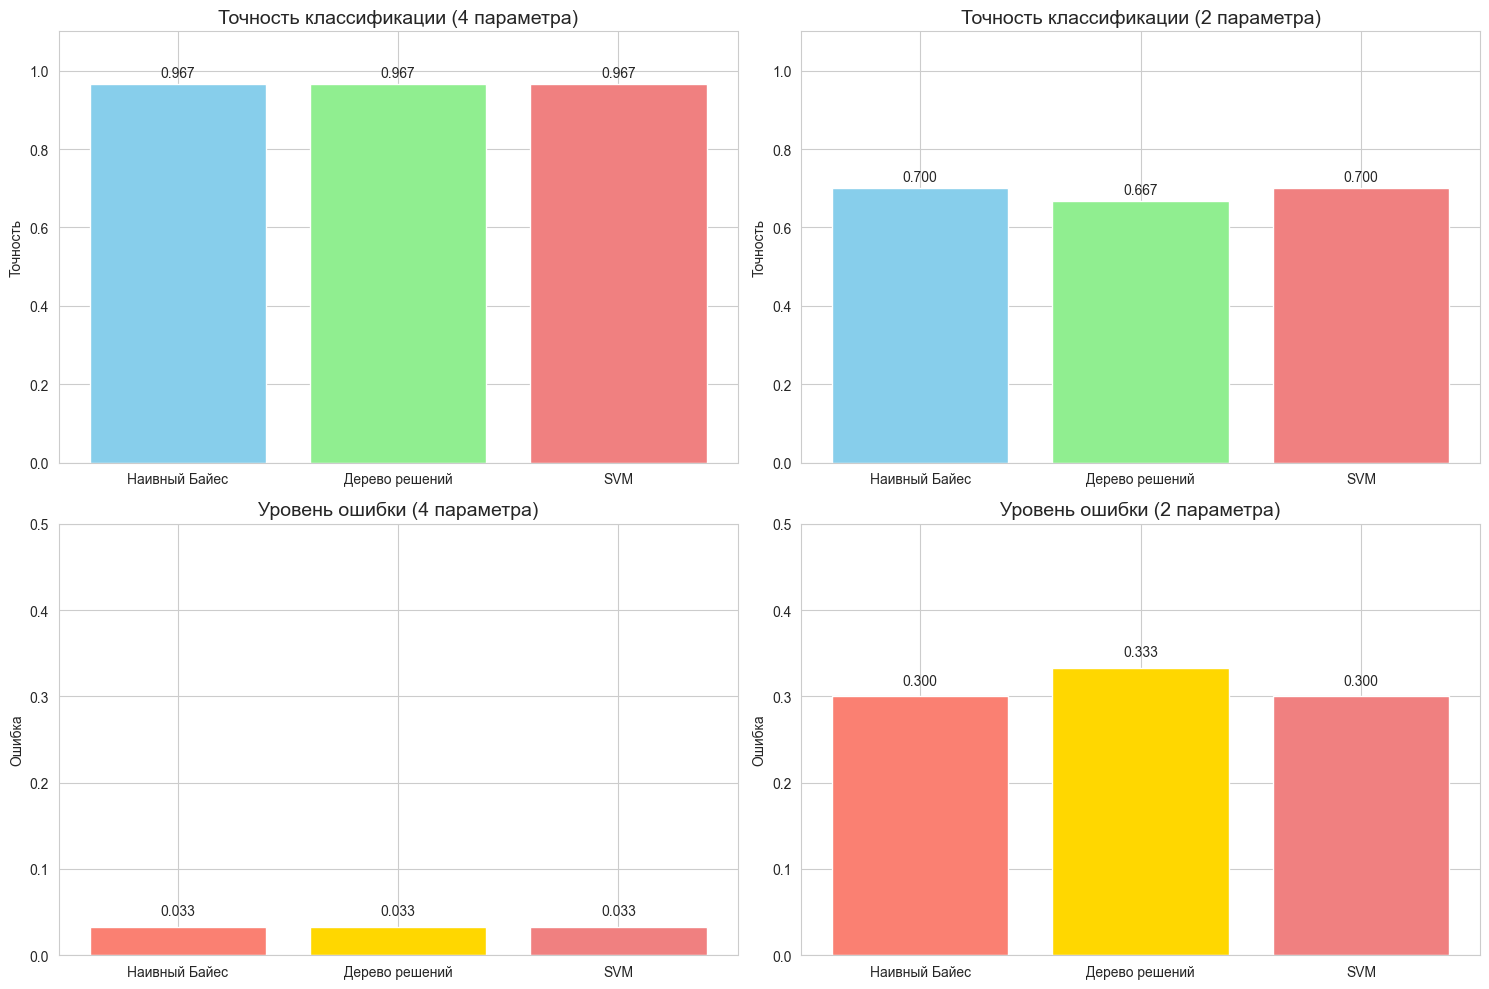

In [35]:
print("6. СРАВНЕНИЕ РЕЗУЛЬТАТОВ")
print("=" * 50)

# Создание расширенной таблицы результатов
results = {
    'Метод': ['Наивный Байес', 'Дерево решений', 'SVM'],
    'Точность (4 параметра)': [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_svm)
    ],
    'Ошибка (4 параметра)': [
        1 - accuracy_score(y_test, y_pred_nb),
        1 - accuracy_score(y_test, y_pred_dt),
        1 - accuracy_score(y_test, y_pred_svm)
    ],
    'Точность (2 параметра)': [
        accuracy_score(y_test_2d, y_pred_nb_2d),
        accuracy_score(y_test_2d, y_pred_dt_2d),
        accuracy_score(y_test_2d, y_pred_svm_2d)
    ],
    'Ошибка (2 параметра)': [
        1 - accuracy_score(y_test_2d, y_pred_nb_2d),
        1 - accuracy_score(y_test_2d, y_pred_dt_2d),
        1 - accuracy_score(y_test_2d, y_pred_svm_2d)
    ]
}

results_df = pd.DataFrame(results)
print("Сводная таблица результатов:")
print(results_df.round(3))

# Визуализация сравнения
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# График точности для 4 параметров
methods = results_df['Метод']
accuracy_4d = results_df['Точность (4 параметра)']
bars1 = ax1.bar(methods, accuracy_4d, color=['skyblue', 'lightgreen', 'lightcoral'])
ax1.set_title('Точность классификации (4 параметра)', fontsize=14)
ax1.set_ylabel('Точность')
ax1.set_ylim(0, 1.1)
# Добавляем значения на столбцы
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom')

# График точности для 2 параметров
accuracy_2d = results_df['Точность (2 параметра)']
bars2 = ax2.bar(methods, accuracy_2d, color=['skyblue', 'lightgreen', 'lightcoral'])
ax2.set_title('Точность классификации (2 параметра)', fontsize=14)
ax2.set_ylabel('Точность')
ax2.set_ylim(0, 1.1)
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom')

# График ошибок для 4 параметров
error_4d = results_df['Ошибка (4 параметра)']
bars3 = ax3.bar(methods, error_4d, color=['salmon', 'gold', 'lightcoral'])
ax3.set_title('Уровень ошибки (4 параметра)', fontsize=14)
ax3.set_ylabel('Ошибка')
ax3.set_ylim(0, 0.5)
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width() / 2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom')

# График ошибок для 2 параметров
error_2d = results_df['Ошибка (2 параметра)']
bars4 = ax4.bar(methods, error_2d, color=['salmon', 'gold', 'lightcoral'])
ax4.set_title('Уровень ошибки (2 параметра)', fontsize=14)
ax4.set_ylabel('Ошибка')
ax4.set_ylim(0, 0.5)
for bar in bars4:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width() / 2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('comparison_results.png', dpi=300, bbox_inches='tight')
plt.show()



In [36]:
print("7. ИССЛЕДОВАНИЕ ВЛИЯНИЯ ПАРАМЕТРОВ")
print("=" * 50)

# Исследование различных ядер для SVM
print("Влияние ядер SVM на точность (4 параметра):")
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
svm_results = []

for kernel in kernels:
    svm_temp = SVC(kernel=kernel, random_state=42)
    svm_temp.fit(X_train, y_train)
    y_pred_temp = svm_temp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_temp)
    svm_results.append(accuracy)
    print(f"  SVM с ядром '{kernel}': точность = {accuracy:.3f}")

# Исследование глубины дерева
print("\nВлияние глубины дерева на точность (4 параметра):")
depths = [2, 3, 4, 5, None]
tree_results = []

for depth in depths:
    depth_label = 'None' if depth is None else depth
    tree_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_temp.fit(X_train, y_train)
    y_pred_temp = tree_temp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_temp)
    tree_results.append(accuracy)
    print(f"  Дерево с глубиной {depth_label}: точность = {accuracy:.3f}")

print("8. ВЫВОДЫ")
print("=" * 50)

best_method_4d = results_df.loc[results_df['Точность (4 параметра)'].idxmax()]
best_method_2d = results_df.loc[results_df['Точность (2 параметра)'].idxmax()]

print(
    f"Лучший метод для 4 параметров: {best_method_4d['Метод']} (точность: {best_method_4d['Точность (4 параметра)']:.3f})")
print(
    f"Лучший метод для 2 параметров: {best_method_2d['Метод']} (точность: {best_method_2d['Точность (2 параметра)']:.3f})")

if best_method_4d['Точность (4 параметра)'] > best_method_2d['Точность (2 параметра)']:
    print("Использование 4 параметров дает лучшую точность классификации.")
else:
    print("Использование 2 параметров дает сравнимую или лучшую точность.")

print("\nДетальные метрики для лучшей модели с 4 параметрами:")
best_model_4d = None
if best_method_4d['Метод'] == 'Наивный Байес':
    best_model_4d = y_pred_nb
elif best_method_4d['Метод'] == 'Дерево решений':
    best_model_4d = y_pred_dt
else:
    best_model_4d = y_pred_svm

print(classification_report(y_test, best_model_4d, target_names=iris.target_names))

7. ИССЛЕДОВАНИЕ ВЛИЯНИЯ ПАРАМЕТРОВ
Влияние ядер SVM на точность (4 параметра):
  SVM с ядром 'linear': точность = 1.000
  SVM с ядром 'rbf': точность = 0.967
  SVM с ядром 'poly': точность = 0.967
  SVM с ядром 'sigmoid': точность = 0.100

Влияние глубины дерева на точность (4 параметра):
  Дерево с глубиной 2: точность = 0.933
  Дерево с глубиной 3: точность = 0.967
  Дерево с глубиной 4: точность = 0.933
  Дерево с глубиной 5: точность = 0.933
  Дерево с глубиной None: точность = 0.933
8. ВЫВОДЫ
Лучший метод для 4 параметров: Наивный Байес (точность: 0.967)
Лучший метод для 2 параметров: Наивный Байес (точность: 0.700)
Использование 4 параметров дает лучшую точность классификации.

Детальные метрики для лучшей модели с 4 параметрами:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                        